In [1]:
'''
Clustering: Hierarchical 
Dataset : hitters.csv
Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. 
Apply Hierarchical clustering algorithms (based on CRuns column) to find the group of players. 
'''

'Clustering: Hierarchical \nDataset : hitters.csv\nApply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. Apply Hierarchical clustering algorithms (based on CRuns column) to find the group of players. \n'

In [55]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage

In [72]:
data = pd.read_csv(r'LP-1_Dataset\K-Means & Hirarchical Clustering\Hitters.csv')

data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [73]:
data.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [74]:
data = data.dropna(subset=['Salary'])

In [75]:
data = data.dropna(subset=['CRuns']).reset_index(drop=True)
X = data[['CRuns']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
print("Data shape after cleaning:", data.shape)
print("Scaled data shape:", X_scaled.shape)

Data shape after cleaning: (263, 20)
Scaled data shape: (263, 1)


In [77]:
data.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [78]:
data.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [79]:
le = LabelEncoder()
for col in ['League', 'Division', 'NewLeague']:
    data[col] = le.fit_transform(data[col])

In [80]:
linked = linkage(X_scaled, method='ward')

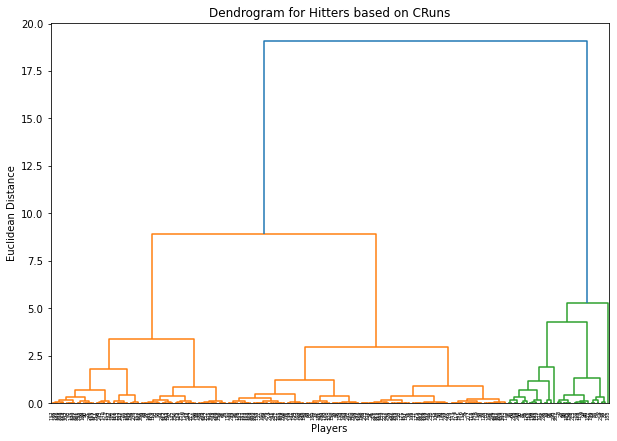

In [81]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hitters based on CRuns")
plt.xlabel("Players")
plt.ylabel("Euclidean Distance")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

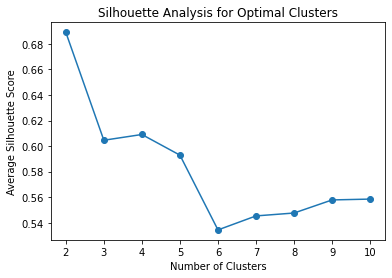

In [82]:
range_n_clusters = range(2, 11)
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.show

In [83]:
X_scaled_df = pd.DataFrame(X_scaled, index=data.index, columns=['CRuns'])
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Cluster'] = hierarchical_clustering.fit_predict(X_scaled_df)

In [84]:
print(data[['CRuns', 'Cluster']].head())

   CRuns  Cluster
0    321        1
1    224        2
2    828        0
3     48        2
4    501        1


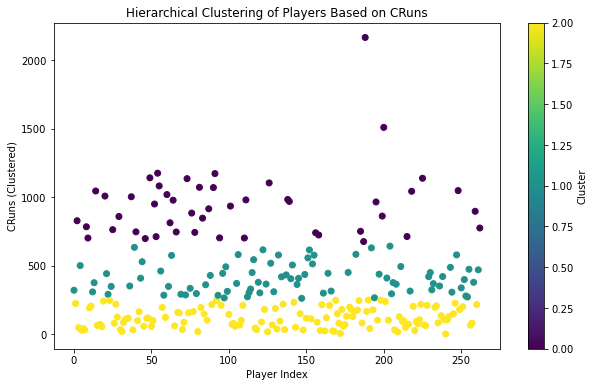

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['CRuns'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering of Players Based on CRuns')
plt.xlabel('Player Index')
plt.ylabel('CRuns (Clustered)')
plt.colorbar(label='Cluster')
plt.show()

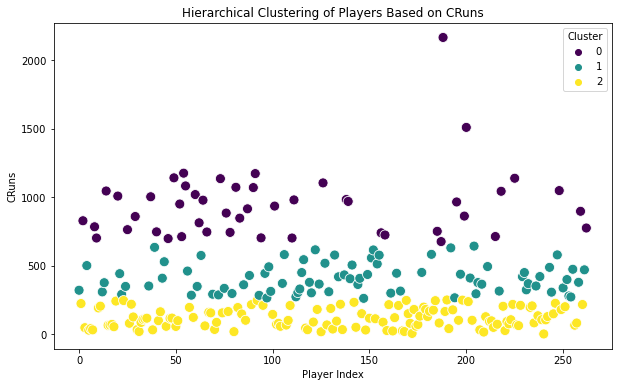

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y=data['CRuns'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Hierarchical Clustering of Players Based on CRuns')
plt.xlabel('Player Index')
plt.ylabel('CRuns')
plt.show()

In [ ]:
pl